In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, LSTM, Conv1D, MaxPool1D, Embedding, Bidirectional
from keras.preprocessing import sequence
from keras.saving import load_model
from sklearn.model_selection import train_test_split

In [ ]:
(training_data, training_targets), (testing_data, testing_targets) = imdb.load_data(num_words=10000)
data = np.concatenate((training_data, testing_data), axis=0)
targets = np.concatenate((training_targets, testing_targets), axis=0)

In [4]:
max_review_length = 500
X_train, X_test, y_train, y_test = train_test_split(data, targets, test_size=0.2, shuffle=True, random_state=42)
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)

In [5]:
from collections import Counter

c = Counter([element for sublist in data for element in sublist])
top_words = len(c) + 2
# mc = {pair[0]: i for i, pair in enumerate(c.most_common(top_words))}

In [9]:
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# print(model.summary())
h = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=64)
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 162s 256ms/step - accuracy: 0.7122 - loss: 0.5187 - val_accuracy: 0.8511 - val_loss: 0.3814
Epoch 2/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 151s 241ms/step - accuracy: 0.8901 - loss: 0.2779 - val_accuracy: 0.8804 - val_loss: 0.2928
Epoch 3/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 150s 240ms/step - accuracy: 0.9198 - loss: 0.2156 - val_accuracy: 0.8924 - val_loss: 0.2684
Accuracy: 89.24%


In [10]:
model2 = Sequential()
model2.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model2.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model2.add(MaxPool1D(pool_size=2))
model2.add(LSTM(100))
model2.add(Dense(1, activation='sigmoid'))

model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
h2 = model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=64)
scores = model2.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 121ms/step - accuracy: 0.7096 - loss: 0.5272 - val_accuracy: 0.8790 - val_loss: 0.2959
Epoch 2/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 130ms/step - accuracy: 0.9131 - loss: 0.2251 - val_accuracy: 0.8954 - val_loss: 0.2721
Epoch 3/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 140s 224ms/step - accuracy: 0.9392 - loss: 0.1707 - val_accuracy: 0.9021 - val_loss: 0.2671
Accuracy: 89.24%


In [14]:
model3 = Sequential()
model3.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model3.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model3.add(MaxPool1D(pool_size=2))
model3.add(Bidirectional(LSTM(100)))
model3.add(Dense(1, activation='sigmoid'))

model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
h3 = model3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=64)
scores = model3.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 126s 195ms/step - accuracy: 0.7260 - loss: 0.4972 - val_accuracy: 0.8748 - val_loss: 0.2871
Epoch 2/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 116s 185ms/step - accuracy: 0.9209 - loss: 0.2043 - val_accuracy: 0.9017 - val_loss: 0.2437
Epoch 3/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 137s 219ms/step - accuracy: 0.9423 - loss: 0.1579 - val_accuracy: 0.8975 - val_loss: 0.2699
Accuracy: 89.75%


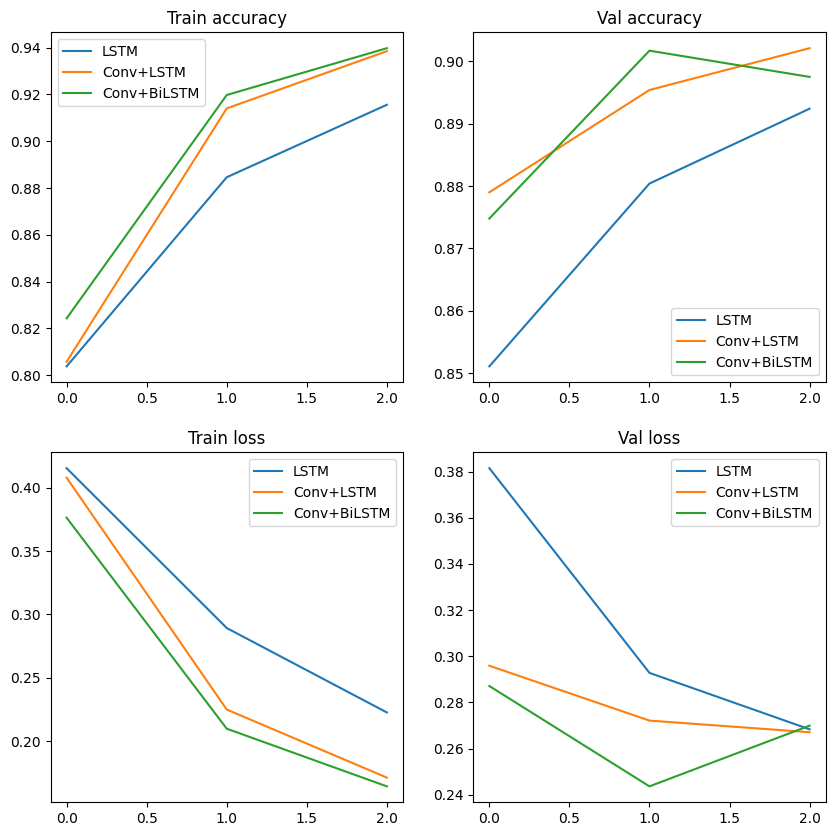

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(10,10), sharey=True)

ax[0, 0].plot(h.history["accuracy"], label=("LSTM"))
ax[0, 0].plot(h2.history["accuracy"], label=("Conv+LSTM"))
ax[0, 0].plot(h3.history["accuracy"], label=("Conv+BiLSTM"))
ax[0, 0].set_title("Train accuracy")
ax[0, 0].legend()

ax[0, 1].plot(h.history["val_accuracy"], label=("LSTM"))
ax[0, 1].plot(h2.history["val_accuracy"], label=("Conv+LSTM"))
ax[0, 1].plot(h3.history["val_accuracy"], label=("Conv+BiLSTM"))
ax[0, 1].set_title("Val accuracy")
ax[0, 1].legend()

ax[1, 0].plot(h.history["loss"], label=("LSTM"))
ax[1, 0].plot(h2.history["loss"], label=("Conv+LSTM"))
ax[1, 0].plot(h3.history["loss"], label=("Conv+BiLSTM"))
ax[1, 0].set_title("Train loss")
ax[1, 0].legend()

ax[1, 1].plot(h.history["val_loss"], label=("LSTM"))
ax[1, 1].plot(h2.history["val_loss"], label=("Conv+LSTM"))
ax[1, 1].plot(h3.history["val_loss"], label=("Conv+BiLSTM"))
ax[1, 1].set_title("Val loss")
ax[1, 1].legend()

plt.show()

In [ ]:
def freeze_frontend(model):
    for param in model.frontend.parameters():
        param.requires_grad = False

def unfreeze_frontend(model):
    for param in model.frontend.parameters():
        param.requires_grad = True

In [17]:
model.save("./models/lstm.keras")
model2.save("./models/conv_lstm.keras")
model3.save("./models/conv_bilstm.keras")

In [2]:
model = load_model("./models/lstm.keras")
model2 = load_model("./models/conv_lstm.keras")
model3 = load_model("./models/conv_bilstm.keras")

In [42]:
def user_input(model, model2, model3, index):
    with open("foo.txt", "r") as file:
        text = file.read()
    encoded = np.expand_dims([index.get(c, 0) if (index.get(c, 0) <= 10_000) else 0 for c in text.split()], axis=0)
    pred1 = (model.predict(encoded, verbose=False) > 0.5) * 1.2
    pred2 = (model2.predict(encoded, verbose=False) > 0.5) * 1.3
    pred3 = (model3.predict(encoded, verbose=False) > 0.5) * 1.4
    total_preds = (pred1 + pred2 + pred3) / 3.9
    return "Positive" if (total_preds > 0.5)[0, 0] else "Negative"
    
index = imdb.get_word_index()
user_input(model, model2, model3, index)

'Positive'